# Before your start:

    Read the README.md file
    Comment as much as you can and use the resources (README.md file)
    Happy learning!

In this exercise, we  will generate random numbers from the continuous disributions we learned in the lesson. There are two ways to generate random numbers:

1. Using the numpy library 
1. using the Scipy library 

Use either or both of the lbraries in this exercise.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random


from scipy.stats import bernoulli, binom, poisson, uniform, expon, norm

## Uniform Distribution

To generate uniform random numbers between any two given values using scipy, we can either use the following code or the code that we have
discussed in class:

In [2]:
from scipy.stats import uniform
x = uniform.rvs(size=10)
a = 2
b = 3
randoms  = a + (b-a)*x
print(randoms)

[2.76747159 2.44093804 2.85601781 2.22044593 2.85177689 2.97667684
 2.21552412 2.23587291 2.95663315 2.81586999]


**Your task:**

1. Based on the code above, write a function that generates uniformly distributed random numbers. There are several requirements for your function:
    * It should accept 3 parameters: 
        * `bottom` - the lower boundary of the generated numbers
        * `ceiling` - the upper boundary of the generated numbers
        * `count` - how many numbers to generate
    * It should return an array of uniformly distributed random numbers

1. Call your function with 2 sets of params below:
    * bottom=10, ceiling=15, count=100
    * bottom=10, ceiling=60, count=1,000

1. Plot the uniform distributions generated above using histograms, where x axis is the value and y axis is the count. Let the histogram's number of bins be 10.

Your output should look like below:

![uniform distribution](ud.png)

In [3]:
# your code here

def unidist(bottom, ceiling, count):
    x = uniform.rvs(size=count)
    a = bottom
    b = ceiling
    randoms = a + (b-a)*x   
    return randoms

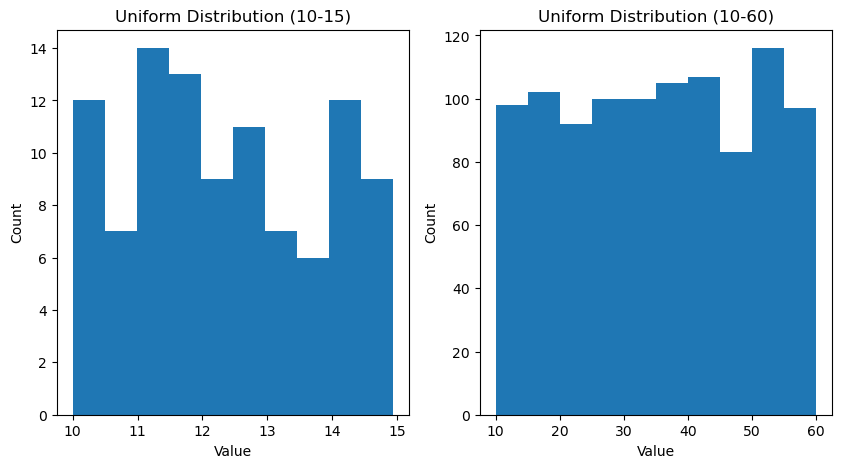

In [4]:
chart1 = unidist(10, 15, 100)
chart2 = unidist(10, 60, 1000)

## Subplotting
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

## Histograms
ax1.hist(chart1, bins=10)
ax1.set_title('Uniform Distribution (10-15)')
ax1.set_xlabel('Value')
ax1.set_ylabel('Count')

ax2.hist(chart2, bins=10)
ax2.set_title('Uniform Distribution (10-60)')
ax2.set_xlabel('Value')
ax2.set_ylabel('Count')

plt.show()

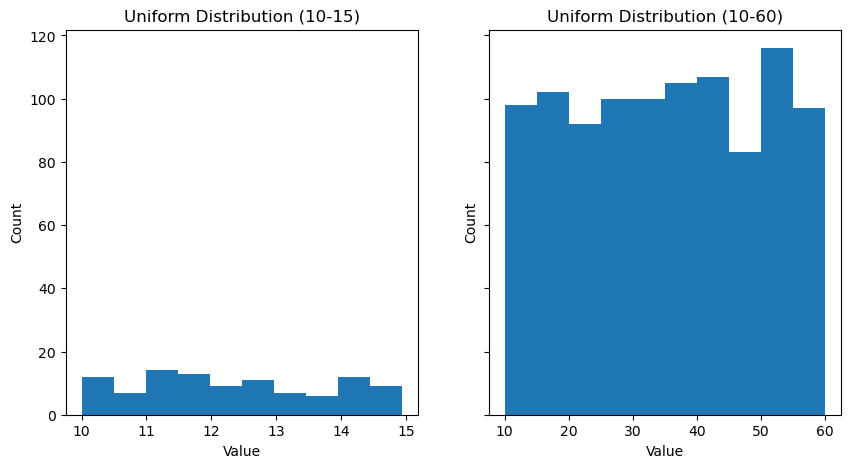

In [5]:
## Subplotting
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5), sharey = True)

## Histograms
ax1.hist(chart1, bins=10)
ax1.set_title('Uniform Distribution (10-15)')
ax1.set_xlabel('Value')
ax1.set_ylabel('Count')

ax2.hist(chart2, bins=10)
ax2.set_title('Uniform Distribution (10-60)')
ax2.set_xlabel('Value')
ax2.set_ylabel('Count')

plt.show()

## Took me a while to understand the sharey parameter

How are the two distributions different?

In [6]:
# your answer here:

## I was trying to understand more about uniform distribution, but from my knowledge the two seem to be uniform,
## they have a more or less "rectangular", which represents a somewhat constant probability. The main difference
## here appears to be the count of total numbers, which makes the graphs look less similar than they are.

## Normal Distribution

1. In the same way in the Uniform Distribution challenge, write a function that generates normally distributed random numbers.
1. Generate 1,000 normally distributed numbers with the average of 10 and standard deviation of 1
1. Generate 1,000 normally distributed numbers with the average of 10 and standard deviation of 50
2. Plot the distributions of the data generated.

Expected output:

![normal distribution](nd.png)

In [8]:
# your code here

def normdist(mean, std):
    normal = norm(mean, std) 
    return normal.rvs(size=1000)

chart1 = normdist(10,1)
chart2 = normdist(10,50)

How are the two distributions different?

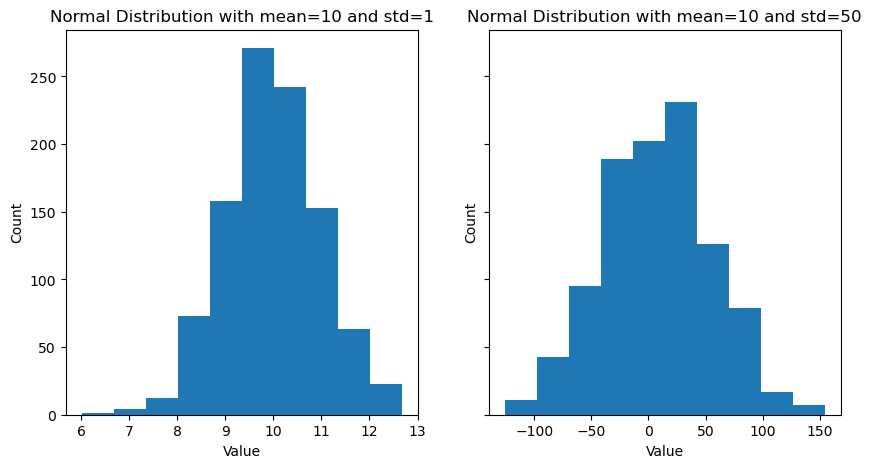

In [12]:
# your answer here:

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5), sharey = True)

## Histograms
ax1.hist(chart1)
ax1.set_title('Normal Distribution with mean=10 and std=1')
ax1.set_xlabel('Value')
ax1.set_ylabel('Count')

ax2.hist(chart2)
ax2.set_title('Normal Distribution with mean=10 and std=50')
ax2.set_xlabel('Value')
ax2.set_ylabel('Count')

plt.show()

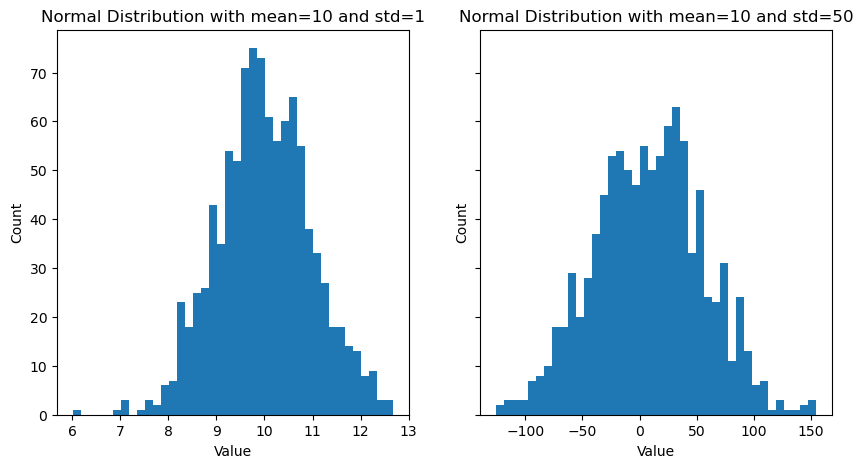

In [14]:
## Increasing the number of bins

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5), sharey = True)

## Histograms
ax1.hist(chart1, bins = 40)
ax1.set_title('Normal Distribution with mean=10 and std=1')
ax1.set_xlabel('Value')
ax1.set_ylabel('Count')

ax2.hist(chart2, bins = 40)
ax2.set_title('Normal Distribution with mean=10 and std=50')
ax2.set_xlabel('Value')
ax2.set_ylabel('Count')

plt.show()

In [ ]:
"""

Both are normal distributions, but since the standard deviation of the second one is 50 we see the data spreading
way more and reaching higher/lower values to both sides of the graph.

"""

## Normal Distribution of Real Data

In this challenge we are going to take a look the real data. We will use vehicles.csv file for this exercise

In [15]:
# your code here

vehicles = pd.read_csv("/Users/caionunez/Desktop/Ironhack/Week5/lab-probability-distributions/your-code/vehicles.csv")
print(vehicles.shape)
vehicles.head()

(35952, 15)


,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


First import vehicles.csv.
Then plot the histograms for the following variables:

1. Fuel Barrels/Year

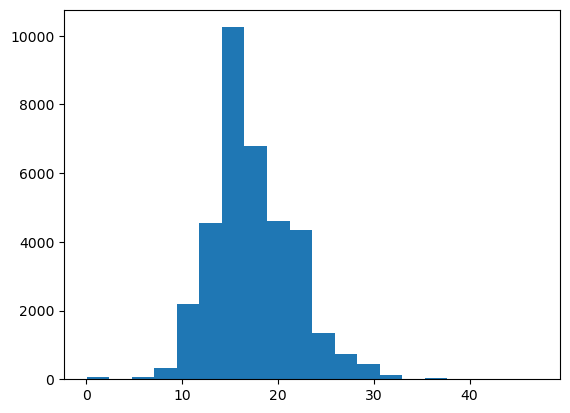

In [20]:
plt.hist(vehicles['Fuel Barrels/Year'], bins= 20)
plt.show()

2. CO2 Emission Grams/Mile 

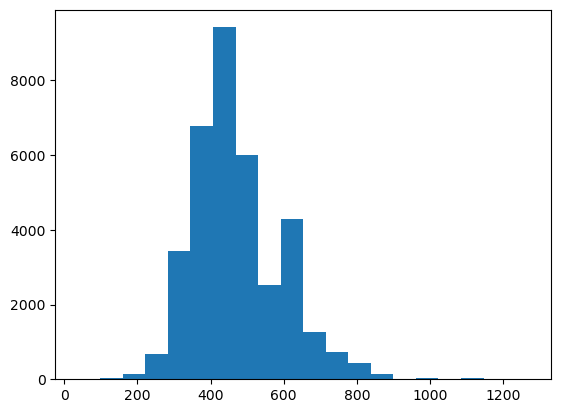

In [19]:
# your code here

plt.hist(vehicles['CO2 Emission Grams/Mile'], bins= 20)
plt.show()

3. Combined MPG

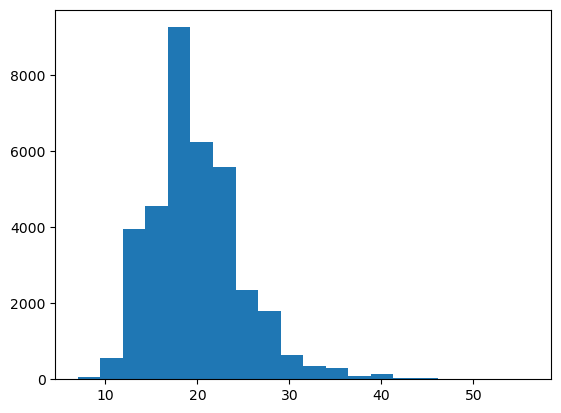

In [21]:
# your code here

plt.hist(vehicles['Combined MPG'], bins= 20)
plt.show()

Which one(s) of the variables are nearly normally distributed? How do you know?

In [ ]:
# you answer here:

"""

From my understanding none of the variables are "exactly" normally distributed, as they all appear to be a bit
skewed to the right. However, out of the three, the ones that resembles a normal distribution more is the first one,
Fuel Barrels/Yer

"""


## Exponential Distribution

1. Using `numpy.random.exponential`, create a function that returns a list of numbers exponentially distributed with the mean of 10. 

1. Use the function to generate two number sequences with a mean of 1 and 100 and a size of 1000.

1. Plot the distributions as histograms with the number of bins as 100.

Your output should look like below:

![exponential distribution](ed.png)

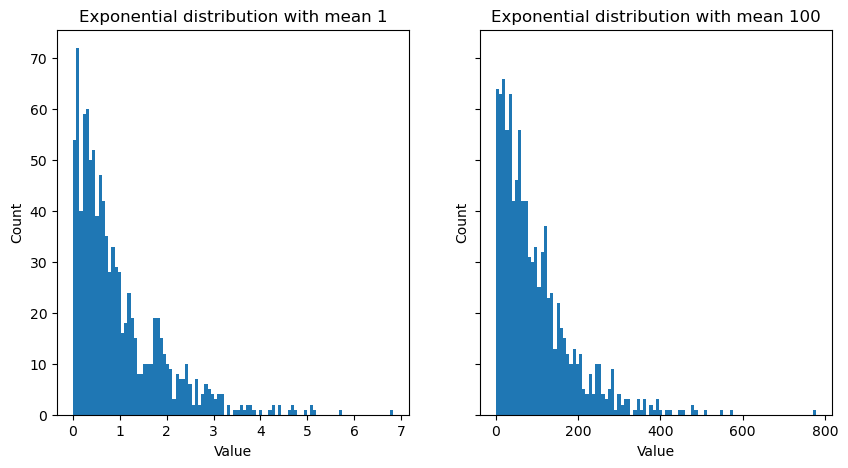

In [29]:
# your code here

## Defining function

def expdist(mean, size):
    return np.random.exponential(scale=mean, size=1000)

## Defining variables to use in the plot
mean_1 = 1
size_1 = 1000
expdist1 = expdist(mean_1, size_1)

mean_2 = 100
size_2 = 1000
expdist2 = expdist(mean_2, size_2)

## Plotting

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5), sharey = True)

## Histograms

ax1.hist(expdist1, bins=100)
ax1.set_title('Exponential distribution with mean 1')
ax1.set_xlabel('Value')
ax1.set_ylabel('Count')

ax2.hist(expdist2, bins=100)
ax2.set_title('Exponential distribution with mean 100')
ax2.set_xlabel('Value')
ax2.set_ylabel('Count')

plt.show()

How are the two distributions different?

In [ ]:
# your answer here:

"""

I don't see a significant difference in the distribution itself, but in the values, due to the difference
we set for the mean of the graphs. 

"""

## Exponential Distribution of Real Data

Suppose that the amount of time one spends in a bank is exponentially distributed with mean as 10 minutes (i.e. λ = 1/10). What is the probability that a customer will spend less than fifteen minutes in the bank? 

Write a code in python to solve this problem

In [34]:
# your answer here
# Hint: This is same as saying P(x<15)

## Every customer stays in on average 10 minutes on the bank. What is the probability of them spending less than 15?

mu = 10  ## mean of the distribution
x = 15   # time in minutes

## Since it's less than 15, cdf(15) should give us probability

lambda_inv = 10/1

exp_dist = expon(scale = lambda_inv)
print(exp_dist.cdf(15))

## Not entirely sure this is it, but tried to follow the example from the lesson.

0.7768698398515702


What is the probability that the customer will spend more than 15 minutes

In [35]:
# your answer here

## Since it's "everything" but the chance of staying until 15 minutes, it would be 1 - cdf of 15

print(1- exp_dist.cdf(15))

0.2231301601484298
